In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pprint

pd.options.display.max_columns = 150

pd.options.display.max_rows = 150


# chargement et affichage des données

data = pd.read_csv('kc_house_data.csv')
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [204]:
data.columns=data.columns.str.lower().str.strip().str.replace(' ','_') 
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [205]:
print(data.isnull().sum()) #pas de information manquante

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [206]:
data["date"]=pd.to_datetime(data['date'])
data["year"]=data["date"].dt.year

data["month"]=data["date"].dt.month
data[["month","date"]]
data 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [207]:
data.loc[data["id"].duplicated(keep=False),:]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,7
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,2014,12
313,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,6
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,2014,12
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,2014,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20670,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,3,8,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,2015,3
20779,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,2014,6
20780,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,2015,5
21580,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,3,9,2780,0,2013,0,98065,47.5184,-121.886,2850,6000,2014,10


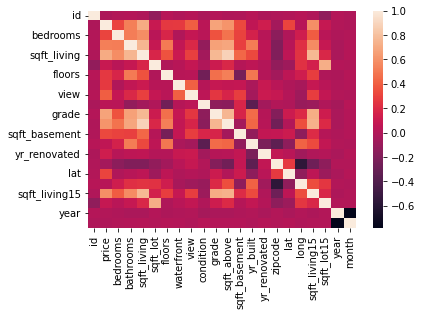

In [208]:

sns.heatmap(data.corr()) #rouge = grosse corelation  #noir = pas de corelation
plt.show()

In [209]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


In [210]:
data.rename(columns = {'price': 'price(thousand dollard)', 'sqft_living': 'm2_living',"sqft_lot":"m2_lot","sqft_basement":"m2_basement","sqft_living15":"m2_living15",
"sqft_lot15":"m2_lot15","sqft_above":"m2_above"},inplace = True)
data['price(thousand dollard)']= data['price(thousand dollard)']/1000
data['m2_living']=data['m2_living']* 0.092903
data["m2_lot"]=data["m2_lot"]* 0.092903
data["m2_basement"]=data["m2_basement"]* 0.092903
data["m2_living15"]=data["m2_living15"]* 0.092903
data["m2_lot15"]=data["m2_lot15"]* 0.092903
data["m2_above"] = data["m2_above"] * 0.092903
data

,id,date,price(thousand dollard),bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,year,month
0,7129300520,2014-10-13,221.900,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2014,10
1,6414100192,2014-12-09,538.000,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2014,12
2,5631500400,2015-02-25,180.000,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2015,2
3,2487200875,2014-12-09,604.000,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,2014,12
4,1954400510,2015-02-18,510.000,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360.000,3,2.50,142.14159,105.073293,3.0,0,0,3,8,142.14159,0.00000,2009,0,98103,47.6993,-122.346,142.14159,140.190627,2014,5
21609,6600060120,2015-02-23,400.000,4,2.50,214.60593,540.045139,2.0,0,0,3,8,214.60593,0.00000,2014,0,98146,47.5107,-122.362,170.01249,668.901600,2015,2
21610,1523300141,2014-06-23,402.101,2,0.75,94.76106,125.419050,2.0,0,0,3,7,94.76106,0.00000,2009,0,98144,47.5944,-122.299,94.76106,186.456321,2014,6
21611,291310100,2015-01-16,400.000,3,2.50,148.64480,221.852364,2.0,0,0,3,8,148.64480,0.00000,2004,0,98027,47.5345,-122.069,130.99323,119.566161,2015,1


In [211]:
data.drop(columns=["date"], axis=1 )

,id,price(thousand dollard),bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_above,m2_basement,yr_built,yr_renovated,zipcode,lat,long,m2_living15,m2_lot15,year,month
0,7129300520,221.900,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,98178,47.5112,-122.257,124.49002,524.901950,2014,10
1,6414100192,538.000,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,98125,47.7210,-122.319,157.00607,709.686017,2014,12
2,5631500400,180.000,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,98028,47.7379,-122.233,252.69616,748.983986,2015,2
3,2487200875,604.000,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,98136,47.5208,-122.393,126.34808,464.515000,2014,12
4,1954400510,510.000,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,98074,47.6168,-122.045,167.22540,697.051209,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360.000,3,2.50,142.14159,105.073293,3.0,0,0,3,8,142.14159,0.00000,2009,0,98103,47.6993,-122.346,142.14159,140.190627,2014,5
21609,6600060120,400.000,4,2.50,214.60593,540.045139,2.0,0,0,3,8,214.60593,0.00000,2014,0,98146,47.5107,-122.362,170.01249,668.901600,2015,2
21610,1523300141,402.101,2,0.75,94.76106,125.419050,2.0,0,0,3,7,94.76106,0.00000,2009,0,98144,47.5944,-122.299,94.76106,186.456321,2014,6
21611,291310100,400.000,3,2.50,148.64480,221.852364,2.0,0,0,3,8,148.64480,0.00000,2004,0,98027,47.5345,-122.069,130.99323,119.566161,2015,1


In [212]:
data["zipcode"] = data["zipcode"].astype(str)



In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       21613 non-null  int64         
 1   date                     21613 non-null  datetime64[ns]
 2   price(thousand dollard)  21613 non-null  float64       
 3   bedrooms                 21613 non-null  int64         
 4   bathrooms                21613 non-null  float64       
 5   m2_living                21613 non-null  float64       
 6   m2_lot                   21613 non-null  float64       
 7   floors                   21613 non-null  float64       
 8   waterfront               21613 non-null  int64         
 9   view                     21613 non-null  int64         
 10  condition                21613 non-null  int64         
 11  grade                    21613 non-null  int64         
 12  m2_above                 21613 n

In [214]:
df_dum = pd.get_dummies(data)
df_dum


,id,date,price(thousand dollard),bedrooms,bathrooms,m2_living,m2_lot,floors,waterfront,view,condition,grade,m2_above,m2_basement,yr_built,yr_renovated,lat,long,m2_living15,m2_lot15,year,month,zipcode_98001,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,2014-10-13,221.900,3,1.00,109.62554,524.901950,1.0,0,0,3,7,109.62554,0.00000,1955,0,47.5112,-122.257,124.49002,524.901950,2014,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,6414100192,2014-12-09,538.000,3,2.25,238.76071,672.803526,2.0,0,0,3,7,201.59951,37.16120,1951,1991,47.7210,-122.319,157.00607,709.686017,2014,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5631500400,2015-02-25,180.000,2,1.00,71.53531,929.030000,1.0,0,0,3,6,71.53531,0.00000,1933,0,47.7379,-122.233,252.69616,748.983986,2015,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2487200875,2014-12-09,604.000,4,3.00,182.08988,464.515000,1.0,0,0,5,7,97.54815,84.54173,1965,0,47.5208,-122.393,126.34808,464.515000,2014,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1954400510,2015-02-18,510.000,3,2.00,156.07704,750.656240,1.0,0,0,3,8,156.07704,0.00000,1987,0,47.6168,-122.045,167.22540,697.051209,2015,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360.000,3,2.50,142.14159,105.073293,3.0,0,0,3,8,142.14159,0.00000,2009,0,47.6993,-122.346,142.14159,140.190627,2014,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21609,6600060120,2015-02-23,400.000,4,2.50,214.60593,540.045139,2.0,0,0,3,8,214.60593,0.00000,2014,0,47.5107,-122.362,170.01249,668.901600,2015,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
21610,1523300141,2014-06-23,402.101,2,0.75,94.76106,125.419050,2.0,0,0,3,7,94.76106,0.00000,2009,0,47.5944,-122.299,94.76106,186.456321,2014,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21611,291310100,2015-01-16,400.000,3,2.50,148.64480,221.852364,2.0,0,0,3,8,148.64480,0.00000,2004,0,47.5345,-122.069,130.99323,119.566161,2015,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [215]:
df_corr = df_dum.corrwith(data["price(thousand dollard)"])

In [216]:
df_corr.sort_values(ascending=False,inplace=True)

In [217]:
df_corr


price(thousand dollard)    1.000000
m2_living                  0.702035
grade                      0.667434
m2_above                   0.605567
m2_living15                0.585379
bathrooms                  0.525138
view                       0.397293
m2_basement                0.323816
bedrooms                   0.308350
lat                        0.307003
zipcode_98004              0.271131
waterfront                 0.266369
floors                     0.256794
zipcode_98039              0.212558
zipcode_98040              0.204873
zipcode_98112              0.169842
zipcode_98006              0.133695
yr_renovated               0.126434
zipcode_98033              0.102556
zipcode_98105              0.090974
m2_lot                     0.089661
zipcode_98075              0.088676
zipcode_98199              0.083659
m2_lot15                   0.082447
zipcode_98119              0.078085
zipcode_98102              0.068738
zipcode_98109              0.065846
zipcode_98005              0

In [218]:
df_corr.to_frame()

,0
price(thousand dollard),1.000000
m2_living,0.702035
grade,0.667434
m2_above,0.605567
m2_living15,0.585379
bathrooms,0.525138
view,0.397293
m2_basement,0.323816
bedrooms,0.308350
lat,0.307003


In [219]:
df_corr.index

Index(['price(thousand dollard)', 'm2_living', 'grade', 'm2_above',
       'm2_living15', 'bathrooms', 'view', 'm2_basement', 'bedrooms', 'lat',
       'zipcode_98004', 'waterfront', 'floors', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98112', 'zipcode_98006', 'yr_renovated',
       'zipcode_98033', 'zipcode_98105', 'm2_lot', 'zipcode_98075',
       'zipcode_98199', 'm2_lot15', 'zipcode_98119', 'zipcode_98102',
       'zipcode_98109', 'zipcode_98005', 'zipcode_98074', 'yr_built',
       'zipcode_98053', 'zipcode_98052', 'zipcode_98177', 'zipcode_98077',
       'condition', 'zipcode_98115', 'zipcode_98008', 'zipcode_98122',
       'zipcode_98027', 'zipcode_98116', 'zipcode_98029', 'long',
       'zipcode_98103', 'zipcode_98144', 'zipcode_98007', 'zipcode_98117',
       'zipcode_98107', 'zipcode_98072', 'zipcode_98024', 'year',
       'zipcode_98136', 'zipcode_98065', 'zipcode_98034', 'month',
       'zipcode_98070', 'zipcode_98011', 'id', 'zipcode_98014',
       'zipcode_98059', 

In [220]:
df_corr.sort_values()


zipcode_98023             -0.106093
zipcode_98042             -0.100370
zipcode_98001             -0.092179
zipcode_98168             -0.091665
zipcode_98002             -0.080300
zipcode_98038             -0.079044
zipcode_98003             -0.076761
zipcode_98106             -0.075365
zipcode_98058             -0.074489
zipcode_98198             -0.074025
zipcode_98031             -0.073939
zipcode_98030             -0.072737
zipcode_98055             -0.071979
zipcode_98092             -0.071805
zipcode_98178             -0.069242
zipcode_98022             -0.063943
zipcode_98133             -0.063778
zipcode_98032             -0.059998
zipcode_98146             -0.057171
zipcode_98188             -0.054409
zipcode_98118             -0.051748
zipcode_98108             -0.046801
zipcode_98155             -0.046009
zipcode_98056             -0.044925
zipcode_98126             -0.040557
zipcode_98148             -0.035743
zipcode_98019             -0.029577
zipcode_98045             -0

In [221]:
data_clean=df_dum[['price(thousand dollard)','m2_living', 'grade', 'm2_above',
       'bathrooms', 'view', 'm2_basement', 'bedrooms',
       'zipcode_98004', 'waterfront', 'floors', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98112', 'zipcode_98006',
       'zipcode_98033','zipcode_98168', 'zipcode_98001', 'zipcode_98042',
       'zipcode_98023']]

In [222]:
mask3 =data_clean["bedrooms"]>22
indexNames= data_clean[mask3].index
data_clean.drop(indexNames,inplace=True)



/home/zhang/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [223]:
mask=data_clean["price(thousand dollard)"]>6800
mask1=data_clean["price(thousand dollard)"]<80

indexNames1= data_clean[mask1].index
indexNames= data_clean[mask].index
data_clean.drop(indexNames , inplace=True)
data_clean.drop(indexNames1 , inplace=True)

/home/zhang/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
mask=data_clean["m2_living"]>1000
indexNames= data_clean[mask].index
data_clean.drop(indexNames , inplace=True)


/home/zhang/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [225]:
mask=data_clean["grade"]<4
indexNames= data_clean[mask].index
data_clean.drop(indexNames , inplace=True)

/home/zhang/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [226]:
mask=data_clean["bathrooms"]<=0.5
mask1=data_clean["bathrooms"]>7
indexNames1= data_clean[mask1].index
indexNames= data_clean[mask].index
data_clean.drop(indexNames , inplace=True)
data_clean.drop(indexNames1 , inplace=True)

/home/zhang/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [227]:
data_clean.describe()

,price(thousand dollard),m2_living,grade,m2_above,bathrooms,view,m2_basement,bedrooms,zipcode_98004,waterfront,floors,zipcode_98039,zipcode_98040,zipcode_98112,zipcode_98006,zipcode_98033,zipcode_98168,zipcode_98001,zipcode_98042,zipcode_98023
count,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000,21591.000000
mean,539.212469,193.108272,7.657311,166.052613,2.115002,0.233755,27.055659,3.370525,0.014636,0.007503,1.494118,0.002269,0.013061,0.012459,0.023065,0.020008,0.012413,0.016720,0.025381,0.023111
std,358.414511,84.455914,1.171363,76.396946,0.764699,0.765310,40.985706,0.903952,0.120092,0.086297,0.539661,0.047586,0.113539,0.110924,0.150114,0.140032,0.110721,0.128223,0.157283,0.150261
min,80.000000,34.374110,4.000000,34.374110,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,322.000000,132.851290,7.000000,110.554570,1.750000,0.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,450.000000,177.444730,7.000000,144.928680,2.250000,0.000000,0.000000,3.000000,0.000000,0.000000,1.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,645.000000,236.902650,8.000000,205.315630,2.500000,0.000000,52.025680,4.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5570.000000,895.584920,13.000000,745.082060,6.750000,4.000000,447.792460,11.000000,1.000000,1.000000,3.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [228]:
data_clean["m2_basement"].sort_values(ascending=False).head(50)


8092     447.792460
15482    325.160500
10085    302.863780
4411     278.709000
5049     264.773550
21344    261.057430
7035     253.625190
6628     252.696160
3020     243.405860
15049    242.476830
2713     241.547800
2125     240.618770
11829    239.689740
2088     238.760710
19215    236.902650
14556    236.902650
2236     232.257500
2444     231.328470
4024     222.967200
1315     222.038170
2399     218.322050
7845     216.463990
7846     216.463990
20460    214.605930
14859    213.676900
13403    209.031750
13528    208.102720
19262    206.244660
15828    206.244660
12682    206.244660
10318    204.386600
16302    204.386600
10980    204.014988
17960    203.457570
20005    202.528540
13778    201.599510
6195     201.599510
5449     201.599510
15560    200.670480
7496     200.670480
13542    200.670480
15698    199.741450
5608     199.741450
4118     199.741450
2668     197.883390
20838    196.954360
2112     196.025330
1199     196.025330
10963    195.096300
4406     195.096300


In [229]:
import plotly.express as px
fig = px.density_mapbox(data, lat='lat', lon='long', z="price(thousand dollard)", radius=10,
                        center=dict(lat=47.5112, lon=-122.257), zoom=0,
                        mapbox_style="stamen-terrain")
fig.show()

In [230]:
data_clean.to_csv("clean_kc_house_data.csv",index=False)